In [1]:
# Libraries
## Mathematics
import numpy as np
from scipy.stats import norm, expon

## Visualization
import matplotlib.pyplot as plt

In [2]:
# Load functions .py files
from Theoretical_boundaries_visualization_functions import optimal_stopping_Brownian_bridge
from Perspective_comparison_functions import simulate_brownian_bridge
from Practical_case_functions import EM_Algorithm, KDE

# Exact optimal stopping boundary for a Dirac Delta distribution

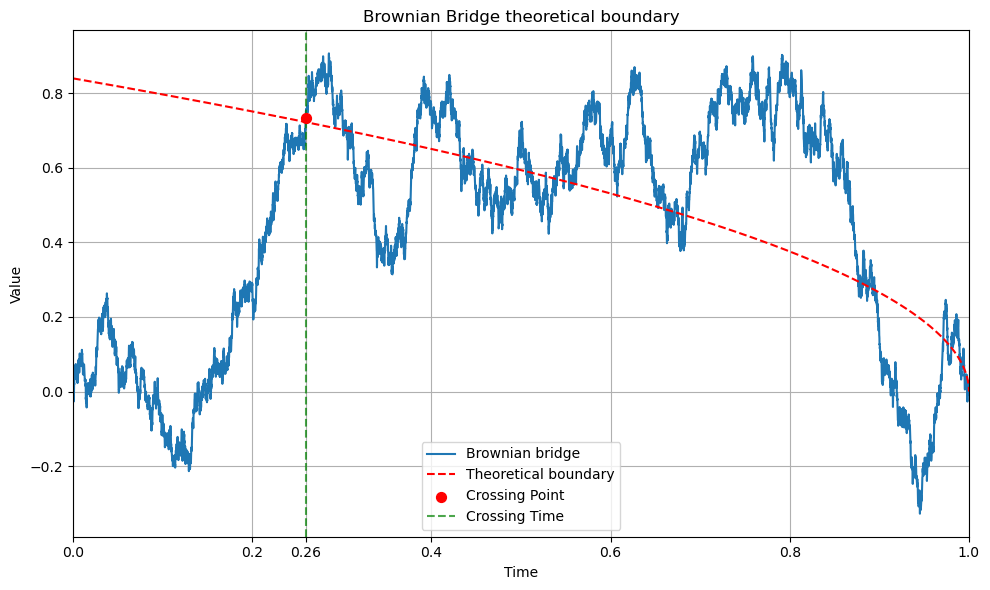

0.2597259725972597


In [3]:
# Initialise variables
r = 0 # Pinning point
mesh = 10000 # Points in temporal grid
t_mesh = np.linspace(0, 1, mesh)

# Boundary
exact_boundary = optimal_stopping_Brownian_bridge(t_mesh, r)

# Brownian bridge
np.random.seed(6)
times, BB = simulate_brownian_bridge(t = 0, z_t = 0, T = 1, z_T = r, u=None, n_steps=mesh)

# Find first crossing index
cross_idx = np.argmax(BB > exact_boundary) if np.any(BB > exact_boundary) else None

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t_mesh, BB, label='Brownian bridge')
plt.plot(t_mesh, exact_boundary, 'r--', label='Theoretical boundary')

if cross_idx is not None: # If the process enters the stopping region, then the cross point exists and cross_idx is not None 
    plt.scatter(t_mesh[cross_idx], BB[cross_idx], color='red', s=50, zorder=5, label='Crossing Point')
    plt.axvline(x=t_mesh[cross_idx], color='green', linestyle='--', alpha=0.7, label='Crossing Time')
    current_ticks = list(plt.xticks()[0])  # ticks existentes
    current_labels = list([tick.get_text() for tick in plt.gca().get_xticklabels()])
    current_ticks.append(t_mesh[cross_idx])
    current_labels.append(f"{t_mesh[cross_idx]:.2f}")
    plt.xticks(current_ticks, current_labels)

plt.title('Brownian Bridge theoretical boundary')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlim(0, 1)
plt.savefig("OSP_BB_visualization.png", dpi=300)
plt.show()

print(t_mesh[cross_idx])

# Density estimation

## EM Algorithm

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

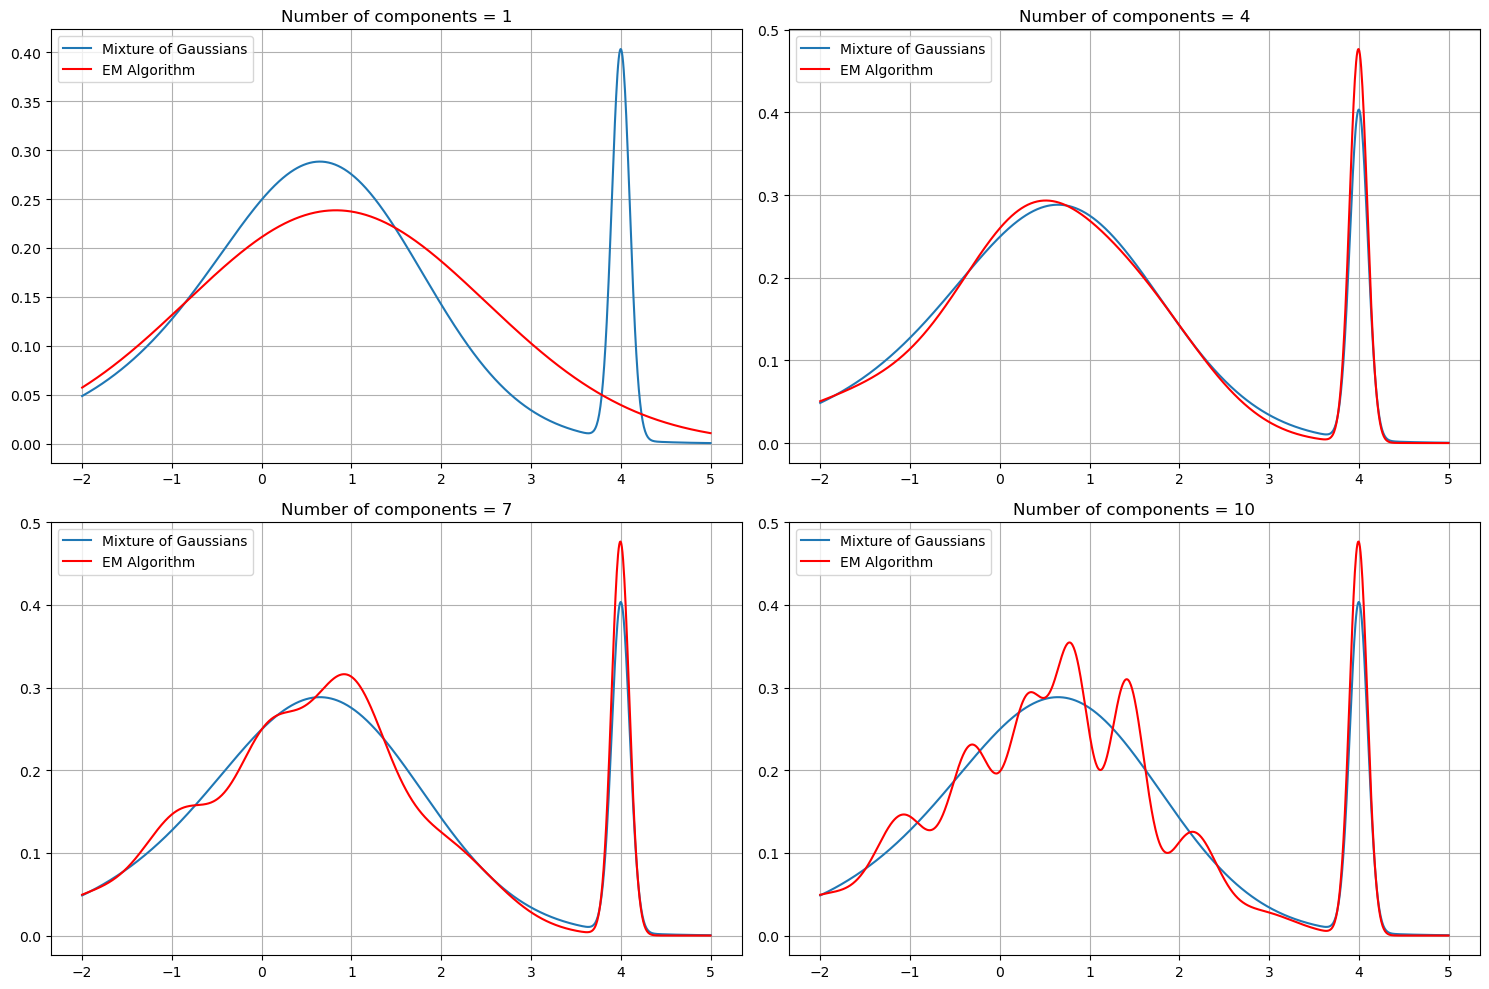

In [4]:
# Set up figure
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
n_components_values = [1, 4, 7, 10]
x = np.linspace(-2, 5, 1000)
means_mixture = np.array([1, 4, 0.5, 0])
sds_mixture = np.array([1, 0.1, 1, 1.5])
weights_mixture = np.array([0.3, 0.1, 0.2, 0.4])
# Mixture pdf
pdf_mixture = np.zeros_like(x)
for w, m, s in zip(weights_mixture, means_mixture, sds_mixture):
    pdf_mixture += w * norm.pdf(x, loc = m, scale = s)

for ax, n in zip(axes.flat, n_components_values):
    # Generate data
    np.random.seed(123)
    # Sample distributions
    selection = np.random.choice(list(range(0,len(weights_mixture))), size = 1000, p = weights_mixture)
    # Points
    random_points = np.random.normal(loc=means_mixture[selection], scale=sds_mixture[selection])
    
    # EM Algorithm
    weights, parameters = EM_Algorithm(Z_1 = random_points, n_components = n)
    means = parameters[0]
    stds = parameters[1]
    
    # Compute EM Algorithm
    pdf = np.zeros_like(x)
    for w, m, s in zip(weights, means, stds):
        pdf += w * norm.pdf(x, loc = m, scale = s)
    
    # Plot
    ax.plot(x, pdf_mixture, label='Mixture of Gaussians')
    ax.plot(x, pdf, label=f'EM Algorithm', color='red')
    ax.set_title(f"Number of components = {n}")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.savefig("EM.png", dpi=300)
plt.show()

In [5]:
# Using BIC
# Generate data
selection = np.random.choice(list(range(0,len(weights_mixture))), size = 1000, p = weights_mixture)
# Points
random_points = np.random.normal(loc=means_mixture[selection], scale=sds_mixture[selection])

# KDE
weights, parameters = EM_Algorithm(Z_1 = random_points, n_components = "BIC", n_components_trials = 16)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

The lowest BIC was achieved with 3 components.


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


## KDE

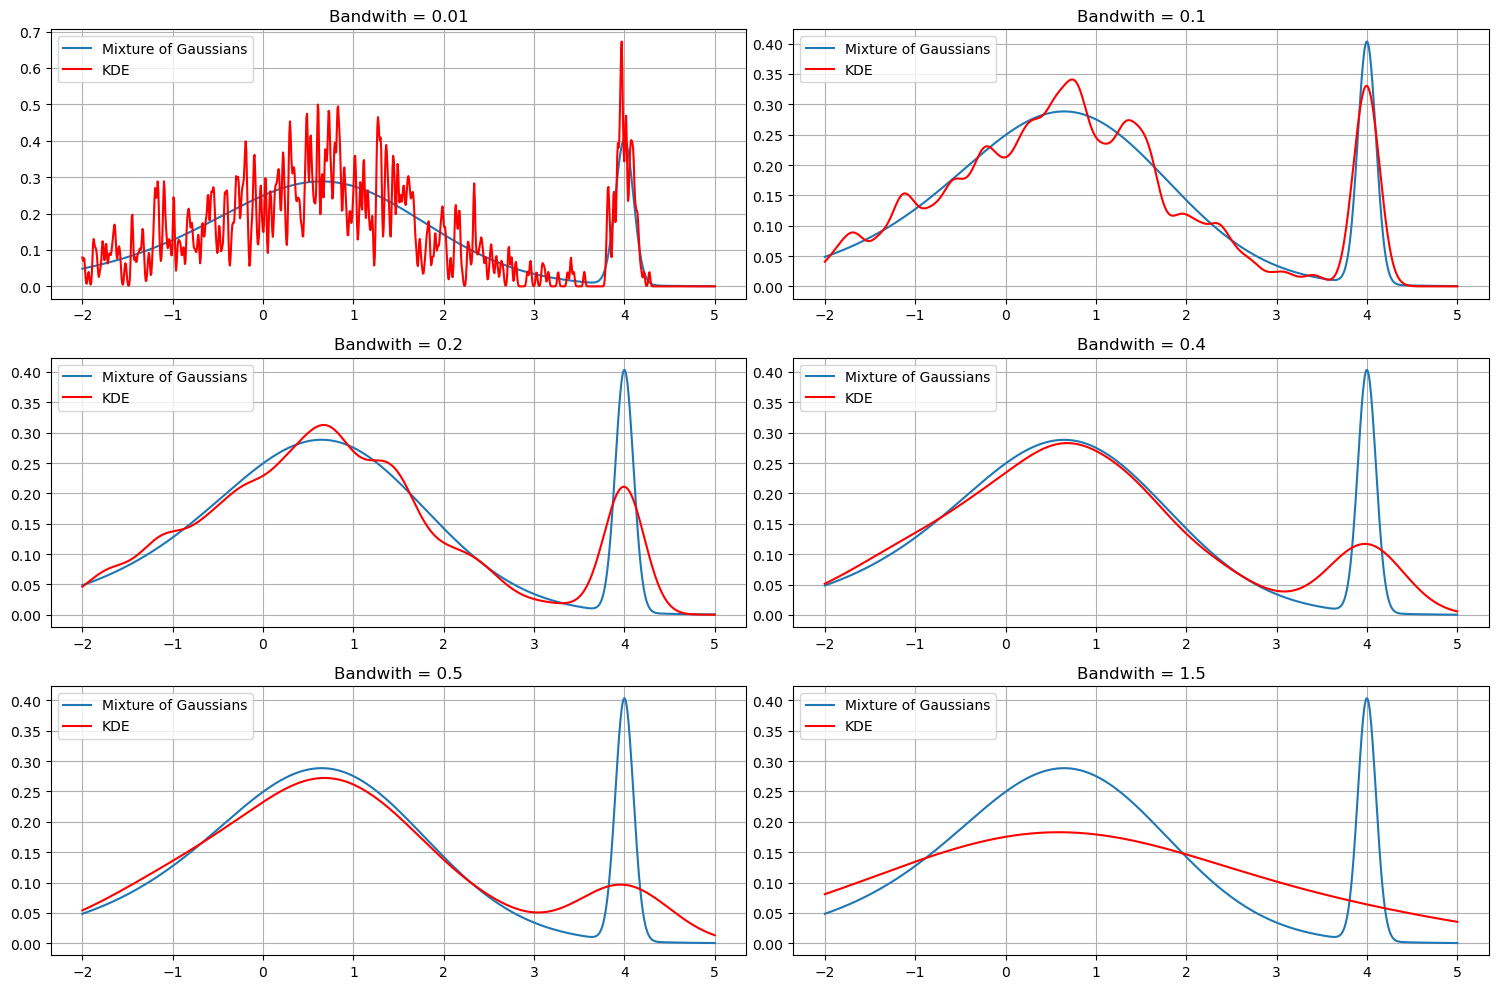

In [6]:
# Set up figure
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
h_values = [0.01, 0.1, 0.2, 0.4, 0.5, 1.5]
x = np.linspace(-2, 5, 1000)
means_mixture = np.array([1, 4, 0.5, 0])
sds_mixture = np.array([1, 0.1, 1, 1.5])
weights_mixture = np.array([0.3, 0.1, 0.2, 0.4])
# Mixture pdf
pdf_mixture = np.zeros_like(random_points)
for w, m, s in zip(weights_mixture, means_mixture, sds_mixture):
    pdf_mixture += w * norm.pdf(x, loc = m, scale = s)

for ax, h in zip(axes.flat, h_values):
    # Generate data
    np.random.seed(123)
    # Sample distributions
    selection = np.random.choice(list(range(0,len(weights_mixture))), size = 1000, p = weights_mixture)
    # Points
    random_points = np.random.normal(loc=means_mixture[selection], scale=sds_mixture[selection])
    # KDE
    weights, parameters = KDE(Z_1 = random_points, bw_method = h)
    means = parameters[0]
    stds = parameters[1]
    
    # Compute KDE
    pdf = np.zeros_like(x)
    for w, m, s in zip(weights, means, stds):
        pdf += w * norm.pdf(x, loc = m, scale = s)
    
    # Plot
    ax.plot(x, pdf_mixture, label='Mixture of Gaussians')
    ax.plot(x, pdf, label=f'KDE', color='red')
    ax.set_title(f"Bandwith = {h}")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.savefig("KDE2.png", dpi=300)
plt.show()